<a href="https://colab.research.google.com/github/raulmaulidhino-dev/Python_EDA_ExploratoryDataAnalysis/blob/main/Student_Scores_Prediction_Supervised_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML MODELLING REGRESSION**
### Finding the best model in predicting students' scores based on the number of study hours

#### **Machine Learning Course Assignment by [dibimbing.id](https://dibimbing.id)**

# **Preparation**

In [1]:
# Import libraries and resources
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('student_scores.csv')

# **Exploratory Data Analysis (EDA)**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.value_counts()

,,count
Hours,Scores,
1.1,17,1
5.1,47,1
8.9,95,1
8.5,75,1
8.3,81,1
7.8,86,1
7.7,85,1
7.4,69,1
6.9,76,1


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

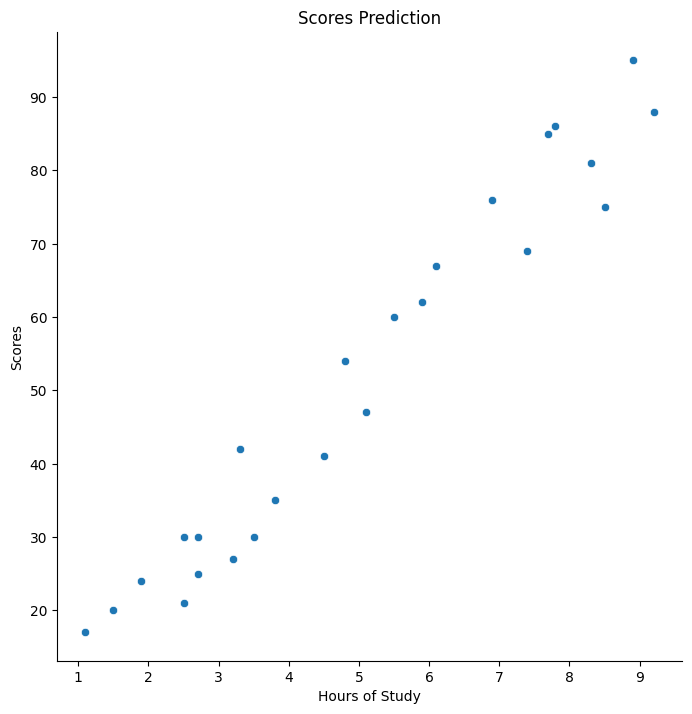

In [6]:
# Plot the data to explain the values and how they are scattered

plt.figure(figsize=(12,6))
sns.pairplot(data,x_vars=["Hours"],y_vars=["Scores"],size=7,kind='scatter')
plt.xlabel("Hours of Study")
plt.ylabel("Scores")
plt.title("Scores Prediction")
plt.show()

# **Feature Engineering**



*   Check Missing Value Handling


In [7]:
data.isna().sum()

,0
Hours,0
Scores,0


In [8]:
data.value_counts()

,,count
Hours,Scores,
1.1,17,1
5.1,47,1
8.9,95,1
8.5,75,1
8.3,81,1
7.8,86,1
7.7,85,1
7.4,69,1
6.9,76,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


*   Check Duplicated Data

In [10]:
df = data.copy()

In [11]:
# Check Any Duplicates
print("Before duplicates checking : ")
print(df.shape)

Before duplicates checking : 
(25, 2)


In [12]:
duplicate_rows_before = df[df.duplicated()]
duplicate_rows_before

,Hours,Scores


In [13]:
df = df.drop_duplicates()

In [14]:
duplicate_rows_before = df[df.duplicated()]
print("Number of duplicate rows : ", duplicate_rows_before.shape)

Number of duplicate rows :  (0, 2)


In [15]:
print("After duplicates checking : ")
print(df.shape)

After duplicates checking : 
(25, 2)


* Outlier Analysis

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

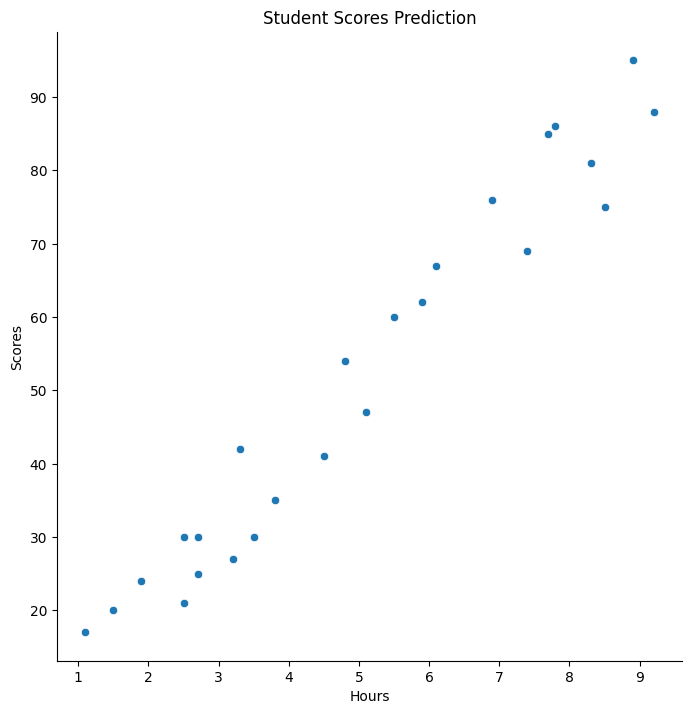

In [16]:
plt.figure(figsize=(12,6))
sns.pairplot(data,x_vars=['Hours'],y_vars=['Scores'], size=7, kind="scatter")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Student Scores Prediction')
plt.show()

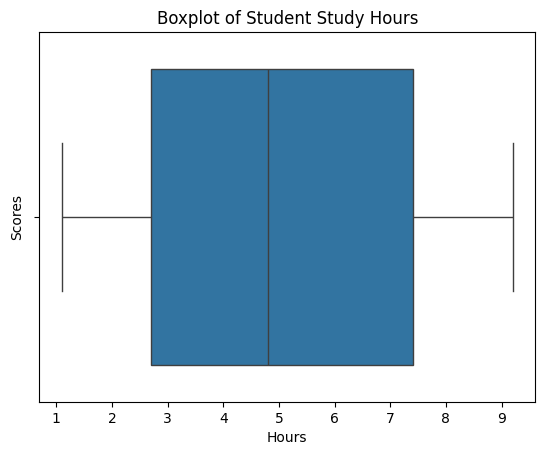

In [17]:
sns.boxplot(x="Hours", data=df)

plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Boxplot of Student Study Hours")

plt.show()

# 2.  Machine Learning Modelling



* Splitting the Data

In [18]:
X = data["Hours"]
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [19]:
y = data["Scores"]
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


* Using the Data to Model and Train

In [20]:
# import the dependencies needed
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [22]:
X_train = np.array(X_train)[:, np.newaxis]
X_test = np.array(X_test)[:, np.newaxis]

In [23]:
X_train

array([[8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [24]:
y_train

,Scores
3,75
4,30
20,30
17,24
21,54
18,67
24,86
7,60
10,85
14,17


## **a. Model 1 : LinearRegression**

In [25]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = lr_model.predict(X_test)
print(y_pred)
print(y_test)

[82.79478941 29.21642585 29.21642585 69.86208096 60.62443207 31.06395563
 36.60654496 53.23431296 41.22536941 19.97877696 35.68278007 47.69172363
 88.33737874]
8     81
16    30
0     21
23    76
11    62
9     25
13    42
1     47
22    35
5     20
2     27
12    41
15    95
Name: Scores, dtype: int64


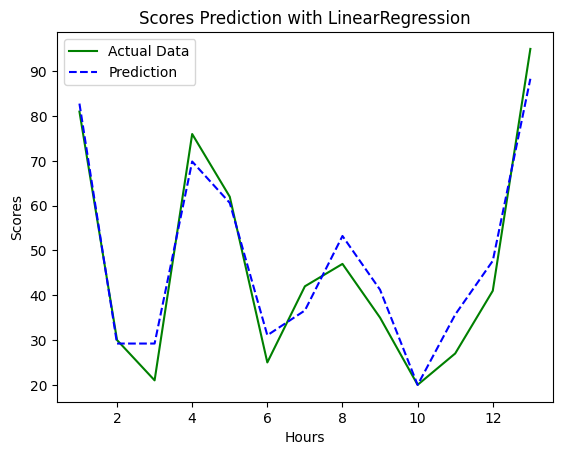

In [27]:
c = [i for i in range(1, len(y_test)+1, 1)]
plt.plot(c,y_test, color='g', linestyle='-', label='Actual Data')
plt.plot(c,y_pred, color='b', linestyle='--', label='Prediction')
plt.title('Scores Prediction with LinearRegression')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

## **Bonus - Linear Equation Form**

In [28]:
# Check the Intercept and Coefficient
print('Intercept of the Linear Regression model:', lr_model.intercept_)
print('Coefficient of the Linear Regression model:', lr_model.coef_)

Intercept of the Linear Regression model: 6.122303630633219
Coefficient of the Linear Regression model: [9.23764889]


Linear Equation Formula : (Approx.)
# **y = 7.96x + 9.23**

## **b. Model 2 : DecisionTreeRegressor**

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [31]:
# DecisionTreeRegressor is predicting..
y_pred_dt = dt_model.predict(X_test)

In [32]:
y_pred_dt

array([75., 30., 30., 69., 67., 30., 30., 54., 30., 17., 30., 54., 88.])

In [33]:
y_test

,Scores
8,81
16,30
0,21
23,76
11,62
9,25
13,42
1,47
22,35
5,20


In [34]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3],
       [5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9]])

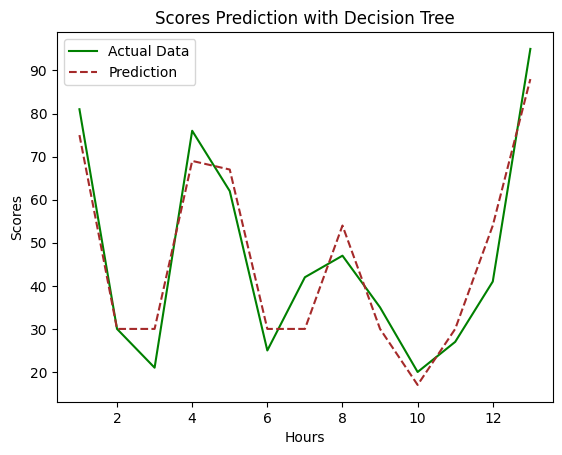

In [35]:
# Plotting the Actual Data and the Prediction
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='g',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_dt,color='brown',linestyle='--',label='Prediction')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Scores Prediction with Decision Tree")
plt.legend()
plt.show()

## **c. Model 3 : RandomForestRegressor**

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
# Predicting Student Scores with RandomForestRegressor
y_pred_rf = rf.predict(X_test)

In [39]:
y_pred_rf

array([78.8 , 28.8 , 28.8 , 73.73, 64.4 , 29.82, 29.82, 55.86, 34.86,
       20.55, 29.82, 49.14, 84.51])

In [40]:
y_test

,Scores
8,81
16,30
0,21
23,76
11,62
9,25
13,42
1,47
22,35
5,20


In [41]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3],
       [5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9]])

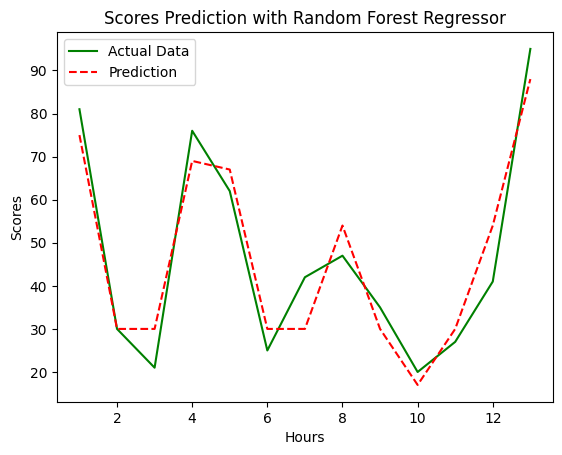

In [42]:
# Plotting the Actual Data and the Prediction
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='g',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_dt,color='r',linestyle='--',label='Prediction')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Scores Prediction with Random Forest Regressor")
plt.legend()
plt.show()

## **Model Evaluation**

In [43]:
from sklearn.metrics import r2_score, mean_squared_error

In [44]:
rsq = r2_score(y_test, y_pred)
rsq_dt = r2_score(y_test, y_pred_dt)
rsq_rf = r2_score(y_test, y_pred_rf)

print("R-squared LinearRegression : ", rsq)
print("R-squared DecisionTreeRegressor : ", rsq_dt)
print("R-squared RandomForestRegressor : ", rsq_rf)

R-squared LinearRegression :  0.9426307007429557
R-squared DecisionTreeRegressor :  0.9082539816297295
R-squared RandomForestRegressor :  0.9297949197354007


# **Conclusion**
Between the three models (LinearRegression, DecisionTreeRegressor, and RandomForestRegressor), model with the best performance is **LinearRegression** 🥳. Here are the R-squared score results :

In [45]:
print(LinearRegression, " : ", rsq)
print(DecisionTreeRegressor, " : ", rsq_dt)
print(RandomForestRegressor, " : ", rsq_rf)

<class 'sklearn.linear_model._base.LinearRegression'>  :  0.9426307007429557
<class 'sklearn.tree._classes.DecisionTreeRegressor'>  :  0.9082539816297295
<class 'sklearn.ensemble._forest.RandomForestRegressor'>  :  0.9297949197354007


#### By : Raul Ahmad Maulidhino
[Linkedin](https://linkedin.com/in/raulahmadm) | [Github](https://github.com/raulmaulidhino-dev)